# Adaptive linear neurons and the convergence of learning

## Implementing Adaline in Python

In [1]:
import numpy as np

class AdalineGD(object):
    """ ADAptive LInear NEuron classifier
    
    Parameters
    --------------
    eta: float
        Learning rate(between 0.0 and 1.0)
    n_iter: int
        Passes over training dataset
    random_state: int
        Random number generator seed for random weight initialization
    
    
    Attributes
    --------------
    w_: 1d-array
        weights after fitting
    cost_ : list
        Sum-of-squares cost function value in each epoch.
       
    """
    
    def __init__(self , eta = 0.01 , n_iter = 50 , random_state = 1):
        self.eta = eta
        self.n_iter = n_iter 
        self.random_state = random_state
    
    def fit(self , X , y):
        """ Fit training data 
        
        Parameters
        -------------
        X : (array-like) , shape = [n_samples , n_features]
            training vectors , where n_samples = # sample and n_features = # features
            
        y : (array-like) , shape = [n_samples]
            Target values
            
        Returns
        -----------
        self:object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0 , scale = 0.01 , size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[0] += self.eta * errors.sum()
            self.w_[1:] += self.eta * X.T.dot(errors)
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        
        return self
    
    def net_input(self , X):
        """Calculate the net input """
        return np.dot(X , self.w_[1:]) + self.w_[0]
    
    def activation(self , X):
        """Compute linear activation"""
        return X
    
    def predict(self , X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >+ 0.0 , 1 , -1)
    

## Importing datasets

In [2]:
import pandas as pd
df = pd.read_csv('F:/Study/[FreeTutorials.Us] Udemy - machine-learning-course-with-python/New folder/Projects/IRIS Flowers/iris.data', header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#select setosa and versicolor
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1 , 1)

#extract sepal length and petal length
X = df.iloc[0:100 , [0 , 2]].values


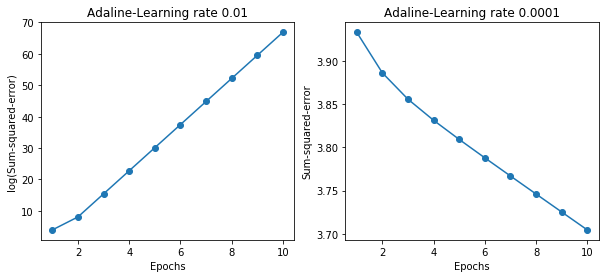

In [4]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (10 , 4))

ada1 = AdalineGD(n_iter = 10 , eta = 0.01).fit(X , y)
ax[0].plot(range(1 , len(ada1.cost_)+1) , np.log(ada1.cost_) , marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline-Learning rate 0.01')

ada2 = AdalineGD(n_iter = 10 , eta = 0.0001).fit(X , y)
ax[1].plot(range(1 , len(ada2.cost_)+1) , np.log(ada2.cost_) , marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline-Learning rate 0.0001')
plt.show()

## Improving Gradient Descent through feature scaling

In [5]:
#standardization of GD

X_std = np.copy(X)
X_std[: , 0] = (X[: , 0] - X[: , 0].mean()) / X[: , 0].std()
X_std[: , 1] = (X[: , 1] - X[: , 1].mean()) / X[: , 1].std()

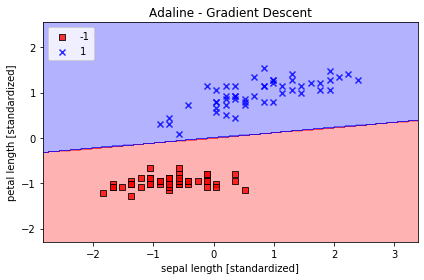

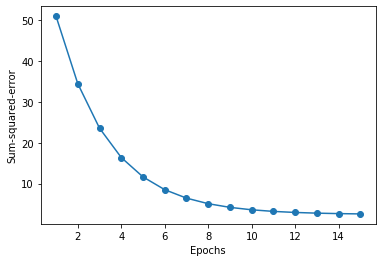

In [6]:
#visualization of decision boundaries for two-dimensional datasets
from matplotlib.colors import ListedColormap
def plot_decision_regions(X , y , classifier , resolution = 0.02):
    
    #setup marker generator and color map
    markers = ('s' , 'x' , 'o' , '^' , 'v')
    colors = ('red' , 'blue' , 'lightgreen' , 'gray' , 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])
    
    #plot decision surface
    x1_min , x1_max = X[: , 0].min() - 1 , X[: , 0].max() + 1
    x2_min , x2_max = X[: , 1].min() - 1 , X[: , 1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution),np.arange(x2_min , x2_max , resolution))
    z = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1 , xx2 , z , alpha = 0.3 , cmap = cmap)
    plt.xlim(xx1.min() , xx1.max())
    plt.ylim(xx2.min() , xx2.max())
    
    #plot class samples
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter( x = X[y == cl , 0] , 
                     y = X[y == cl , 1] , 
                     alpha = 0.8 , 
                     c = colors[idx] , 
                     marker = markers[idx] , 
                     label = cl ,
                     edgecolor = 'black'
        )
        
ada = AdalineGD(n_iter = 15 , eta = 0.01)
ada.fit(X_std , y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent') 
plt.xlabel('sepal length [standardized]') 
plt.ylabel('petal length [standardized]') 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show() 
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o') 
plt.xlabel('Epochs') 
plt.ylabel('Sum-squared-error') 
plt.show()

In [7]:
ada.predict([5.8, 3.2])

array(1)